In [45]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (10,5)

In [104]:
# Data

df = pd.read_csv(r"C:\Users\LENOVO\Music\My_Projects\movies.csv")

In [31]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [105]:
# Creating different column for release date

df["released"] = df["released"].astype(str)

In [106]:
df["release_date"] = df["released"].apply(lambda date: date.split("(")[0].strip())

In [102]:
df["released_date"] = df["released"].apply(lambda date: date.split("(")[0].strip())

In [107]:
df["release_date"] = pd.to_datetime(df["release_date"])

In [108]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980-06-13
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980-07-02
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980-06-20
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980-07-02
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980-07-25


In [109]:
df.isnull().sum()

name               0
rating            77
genre              0
year               0
released           0
score              3
votes              3
director           0
writer             3
star               1
country            3
budget          2171
gross            189
company           17
runtime            4
release_date       2
dtype: int64

In [110]:
round((df.isnull().sum()/len(df))*100,2)

name             0.00
rating           1.00
genre            0.00
year             0.00
released         0.00
score            0.04
votes            0.04
director         0.00
writer           0.04
star             0.01
country          0.04
budget          28.31
gross            2.46
company          0.22
runtime          0.05
release_date     0.03
dtype: float64

<AxesSubplot:>

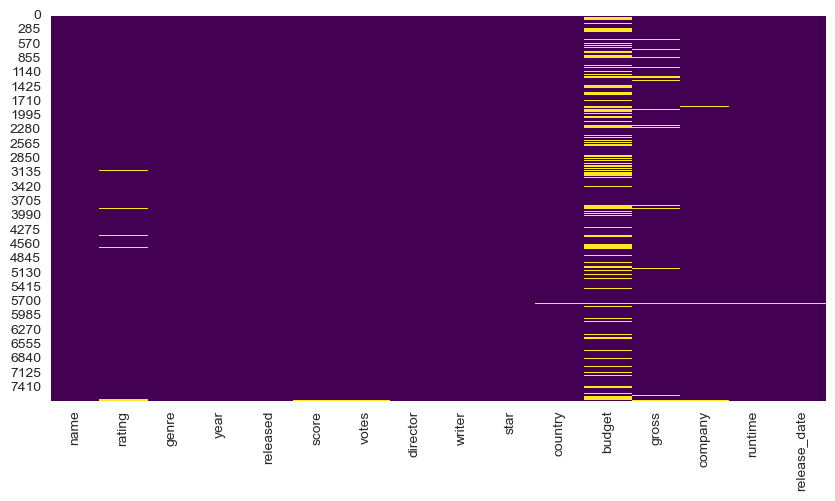

In [111]:
sns.heatmap(df.isnull(),cbar = False, cmap = "viridis")

In [112]:
# Missing value treatment


df["budget"] = df["budget"].fillna(df["budget"].mean())

In [113]:
df["score"] = df["score"].fillna(df["score"].mean())

In [114]:
df["votes"] = df["votes"].fillna(df["votes"].mean())

In [115]:
df["gross"] = df["gross"].fillna(df["gross"].mean())

In [116]:
df['runtime'] = df["runtime"].fillna(df["runtime"].mean())

In [117]:
df.isnull().sum()

name             0
rating          77
genre            0
year             0
released         0
score            0
votes            0
director         0
writer           3
star             1
country          3
budget           0
gross            0
company         17
runtime          0
release_date     2
dtype: int64

In [118]:
df = df.dropna(subset = ["rating","writer","star","country","company","release_date"],axis = 0)

In [119]:
df.shape

(7576, 16)

In [74]:
df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,year
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980-06-13,1980
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980-07-02,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980-06-20,1980
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980-07-02,1980
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980-07-25,1980


In [120]:
# Changing the runtime of some columns

df["votes"] = df["votes"].astype("int64")
df["budget"] = df["budget"].astype("int64")
df["gross"] = df["gross"].astype("int64")

In [121]:
# Dropping the year column as it is not matching withthe release date at some places

df = df.drop(["year"],axis = 1)

In [122]:
# Creating a new year column

df["year"] = df["release_date"].dt.year

In [123]:
# Checking for duplicates

df[df.duplicated(keep = "first")]

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,year


Text(0.5, 1.0, 'Buget vs Gross')

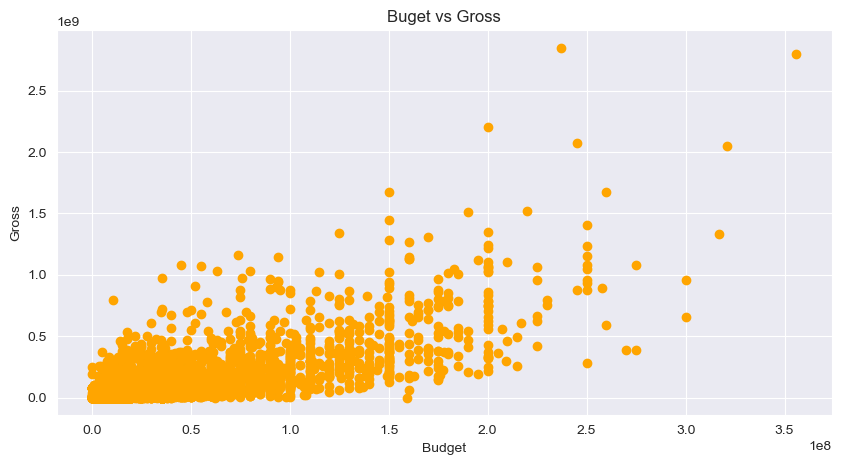

In [124]:
# FInding correlation between Budget and Gross

plt.scatter(df["budget"],df["gross"],color = "orange")

plt.xlabel("Budget")
plt.ylabel("Gross")

plt.title("Buget vs Gross")

<AxesSubplot:xlabel='budget', ylabel='gross'>

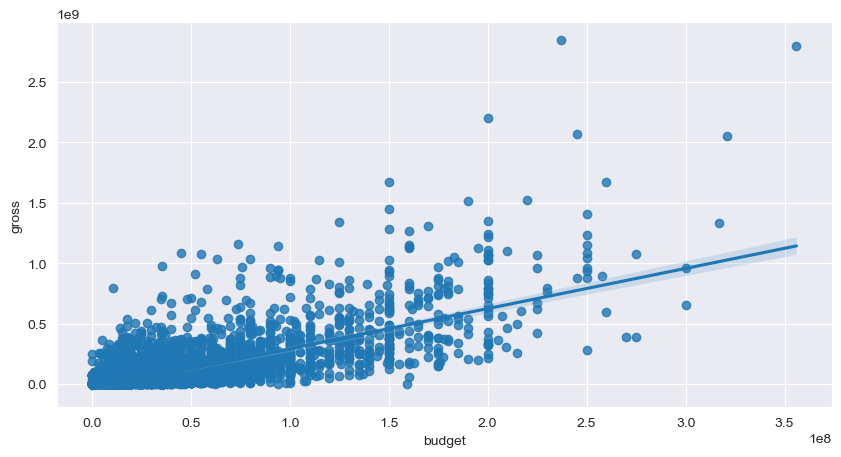

In [125]:
# For better clarity on the correlation

sns.regplot(x = df["budget"], y = df["gross"])

In [126]:
 df.corr()

,score,votes,budget,gross,runtime,year
score,1.000000,0.411938,0.064654,0.185084,0.400526,0.109625
votes,0.411938,1.000000,0.421218,0.629325,0.309353,0.222215
budget,0.064654,0.421218,1.000000,0.712561,0.265934,0.262773
gross,0.185084,0.629325,0.712561,1.000000,0.241618,0.247520
runtime,0.400526,0.309353,0.265934,0.241618,1.000000,0.120502
year,0.109625,0.222215,0.262773,0.247520,0.120502,1.000000


In [127]:
# Finding the correlations

correlation_matrix = df.corr()

Text(0.5, 1.0, 'Correlation Matrix for Numeric Features')

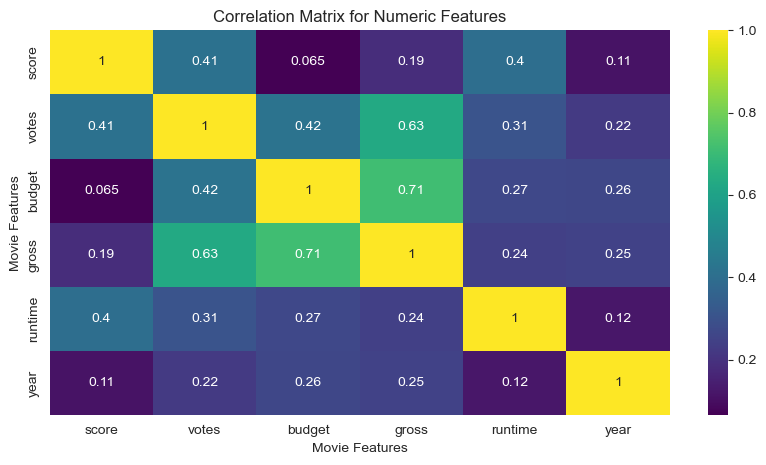

In [128]:
sns.heatmap(correlation_matrix, annot = True, cmap = "viridis")

plt.xlabel("Movie Features")
plt.ylabel("Movie Features")

plt.title("Correlation Matrix for Numeric Features")

In [129]:
df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,year
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980-06-13,1980
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980-07-02,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980-06-20,1980
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980-07-02,1980
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980-07-25,1980


In [131]:
# Movie Ratings

rating = df["rating"].value_counts()

Text(0.5, 1.0, 'Count of movie Ratings')

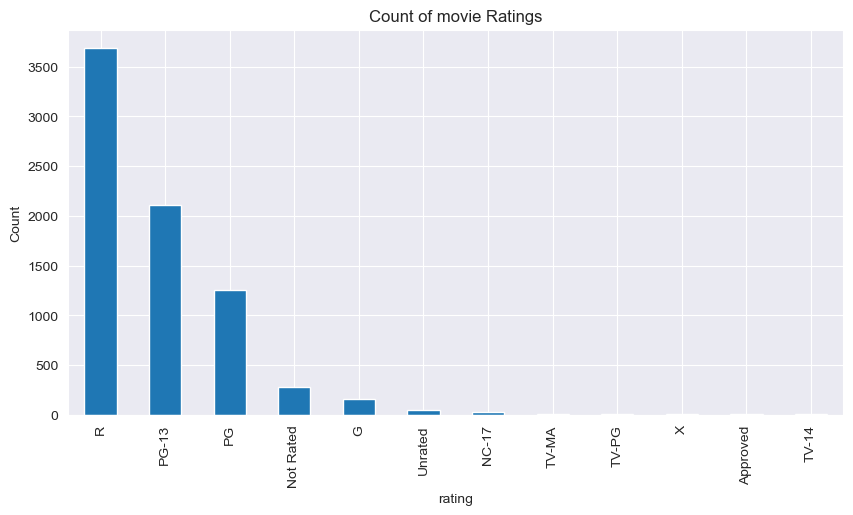

In [133]:
rating.plot(kind = "bar")


plt.xlabel("rating")
plt.ylabel("Count")
plt.title("Count of movie Ratings")

In [135]:
# Top 10 release years

year = df["year"].value_counts().sort_values(ascending = False).head(10)

In [136]:
year

2019    211
2007    211
2015    211
2011    211
1994    205
2008    204
2003    204
1986    204
2018    203
1995    203
Name: year, dtype: int64

<AxesSubplot:>

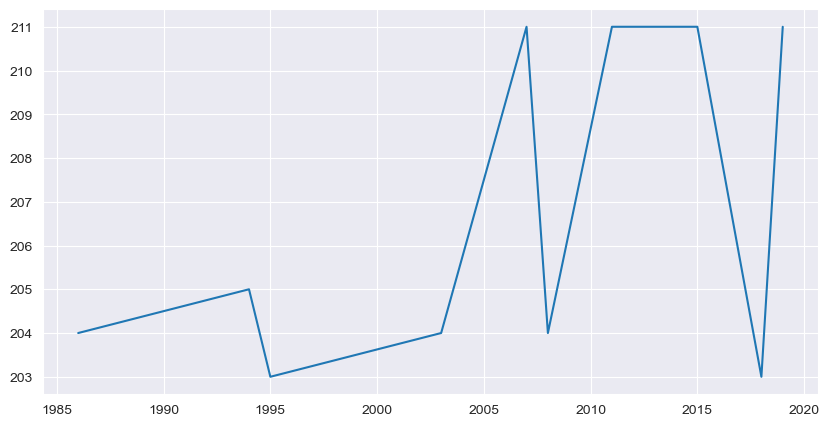

In [137]:
sns.lineplot(x = year.index, y = year.values)

In [141]:
# Top 10 countries

country = df["country"].value_counts().sort_values(ascending = False)[:10]

In [142]:
country

United States     5448
United Kingdom     808
France             265
Canada             187
Germany            114
Australia           91
Japan               75
India               61
Italy               58
Spain               47
Name: country, dtype: int64

Text(0.5, 1.0, 'Country Wise Count of Movies')

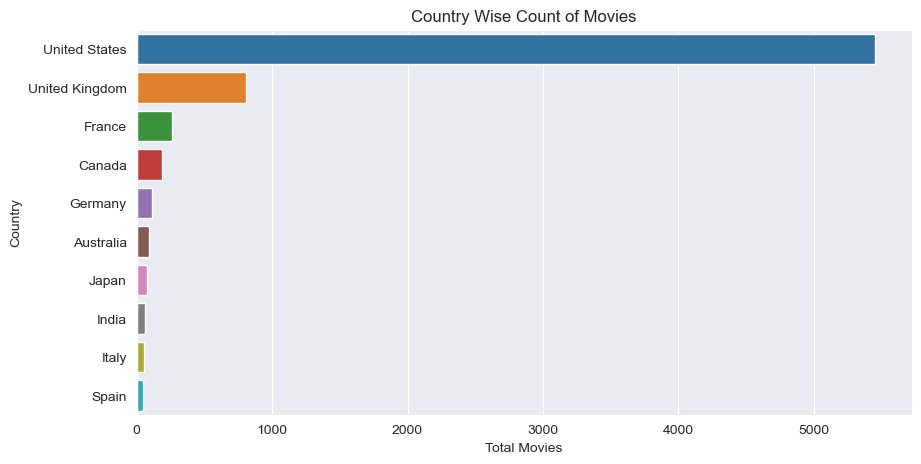

In [146]:
sns.barplot(y = country.index, x = country.values)

plt.ylabel("Country")
plt.xlabel("Total Movies")
plt.title("Country Wise Count of Movies")

In [147]:
# Top 5 actors who stared in the movies

actor = df["star"].value_counts().sort_values(ascending = False)[:5]

In [148]:
actor

Nicolas Cage         43
Robert De Niro       41
Tom Hanks            41
Denzel Washington    37
Bruce Willis         34
Name: star, dtype: int64

([<matplotlib.patches.Wedge at 0x20a24b74070>,
 [Text(0.9260854247937167, 0.7631289445333873, 'Nicolas Cage'),
  Text(-0.5379223293183724, 1.0726786879679753, 'Robert De Niro'),
  Text(-1.1740430420668937, -0.2482396732480814, 'Tom Hanks'),
  Text(-0.12428050946196514, -1.1030205596306328, 'Denzel Washington'),
  Text(1.0261713607740641, -0.6220710074638632, 'Bruce Willis')],
 [Text(0.5402164977963346, 0.44515855097780926, '21.94%'),
  Text(-0.3137880254357172, 0.6257292346479855, '20.92%'),
  Text(-0.684858441205688, -0.1448064760613808, '20.92%'),
  Text(-0.06829829799261146, -0.6061644516889063, '18.88%'),
  Text(0.5985999604515373, -0.36287475435392014, '17.35%')])

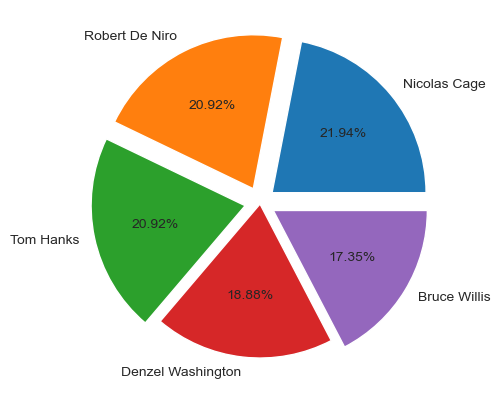

In [151]:
plt.pie(actor, labels = actor.index, autopct="%.2f%%", explode = [0.1,0.1,0.1,0.01,0.1])

In [152]:
df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,year
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980-06-13,1980
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980-07-02,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980-06-20,1980
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980-07-02,1980
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980-07-25,1980


In [173]:
# Average votes received by the top 10 companies

votes = df.pivot_table(index = "company", values = "votes", aggfunc="mean")

In [174]:
votes

,votes
company,
"""DIA"" Productions GmbH & Co. KG",46000.0
"""Weathering With You"" Film Partners",28000.0
.406 Production,5300.0
1+2 Seisaku Iinkai,22000.0
10 West Studios,2600.0
...,...
i am OTHER,82000.0
i5 Films,11000.0
iDeal Partners Film Fund,5300.0


In [177]:
avg_votes = round(df["votes"].mean(),2)

In [178]:
avg_votes

88934.3

In [179]:
# Films which received votes higher than the average votes

films = df[df["votes"] > avg_votes]

In [181]:
films.sort_values(by = "votes", ascending = False)

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,year
2443,The Shawshank Redemption,R,Drama,"October 14, 1994 (United States)",9.3,2400000,Frank Darabont,Stephen King,Tim Robbins,United States,25000000,28817291,Castle Rock Entertainment,142.0,1994-10-14,1994
5243,The Dark Knight,PG-13,Action,"July 18, 2008 (United States)",9.0,2400000,Christopher Nolan,Jonathan Nolan,Christian Bale,United States,185000000,1005973645,Warner Bros.,152.0,2008-07-18,2008
5643,Inception,PG-13,Action,"July 16, 2010 (United States)",8.8,2100000,Christopher Nolan,Christopher Nolan,Leonardo DiCaprio,United States,160000000,836836967,Warner Bros.,148.0,2010-07-16,2010
2444,Pulp Fiction,R,Crime,"October 14, 1994 (United States)",8.9,1900000,Quentin Tarantino,Quentin Tarantino,John Travolta,United States,8000000,213928762,Miramax,154.0,1994-10-14,1994
2445,Forrest Gump,PG-13,Drama,"July 6, 1994 (United States)",8.8,1900000,Robert Zemeckis,Winston Groom,Tom Hanks,United States,55000000,678226133,Paramount Pictures,142.0,1994-07-06,1994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2869,Sling Blade,R,Drama,"March 14, 1997 (United States)",8.0,89000,Billy Bob Thornton,Billy Bob Thornton,Billy Bob Thornton,United States,1000000,24444121,Miramax,135.0,1997-03-14,1997
5791,Beginners,R,Comedy,"June 9, 2011 (Germany)",7.2,89000,Mike Mills,Mike Mills,Ewan McGregor,United States,3200000,14311701,Olympus Pictures,105.0,2011-06-09,2011
2082,Malcolm X,PG-13,Biography,"November 18, 1992 (United States)",7.7,89000,Spike Lee,Alex Haley,Denzel Washington,Japan,33000000,48169910,Largo International N.V.,202.0,1992-11-18,1992
2071,Twin Peaks: Fire Walk with Me,R,Drama,"August 28, 1992 (United States)",7.3,89000,David Lynch,David Lynch,Sheryl Lee,France,10000000,4184990,New Line Cinema,134.0,1992-08-28,1992


In [182]:
# Top 10 movies with the runtime

runtime = df.sort_values(by = "runtime", ascending = False).head(10)

In [183]:
runtime

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,year
4396,The Best of Youth,R,Drama,"June 20, 2003 (Italy)",8.5,21000,Marco Tullio Giordana,Sandro Petraglia,Luigi Lo Cascio,Italy,35589876,2799773,BiBi Film,366.0,2003-06-20,2003
1218,Little Dorrit,G,Drama,"October 21, 1988 (United States)",7.3,1000,Christine Edzard,Charles Dickens,Derek Jacobi,United Kingdom,35589876,1025228,Sands,357.0,1988-10-21,1988
2280,Gettysburg,PG,Drama,"October 8, 1993 (United States)",7.6,27000,Ron Maxwell,Michael Shaara,Tom Berenger,United States,25000000,10769960,TriStar Television,271.0,1993-10-08,1993
2888,Hamlet,PG-13,Drama,"December 25, 1996 (United States)",7.7,37000,Kenneth Branagh,William Shakespeare,Kenneth Branagh,United Kingdom,18000000,4770222,Castle Rock Entertainment,242.0,1996-12-25,1996
1868,The Beautiful Troublemaker,Unrated,Drama,"September 4, 1991 (France)",7.6,7500,Jacques Rivette,Pascal Bonitzer,Michel Piccoli,France,35589876,403056,Pierre Grise Productions,238.0,1991-09-04,1991
479,Once Upon a Time in America,R,Crime,"June 1, 1984 (United States)",8.4,321000,Sergio Leone,Harry Grey,Robert De Niro,Italy,30000000,5473212,The Ladd Company,229.0,1984-06-01,1984
3962,Lagaan: Once Upon a Time in India,PG,Drama,"June 15, 2001 (United States)",8.1,108000,Ashutosh Gowariker,Ashutosh Gowariker,Aamir Khan,India,35589876,1724806,Aamir Khan Productions,224.0,2001-06-15,2001
4343,Gods and Generals,PG-13,Biography,"February 21, 2003 (United States)",6.3,16000,Ron Maxwell,Jeff Shaara,Stephen Lang,United States,56000000,12923936,Turner Pictures (I),219.0,2003-02-21,2003
21,Heaven's Gate,R,Adventure,"April 24, 1981 (United States)",6.8,14000,Michael Cimino,Michael Cimino,Kris Kristofferson,United States,44000000,3484523,Partisan Productions,219.0,1981-04-24,1981
3989,Kabhi Khushi Kabhie Gham...,Not Rated,Drama,"December 14, 2001 (United States)",7.4,46000,Karan Johar,Karan Johar,Shah Rukh Khan,India,7500000,11334547,Dharma Productions,210.0,2001-12-14,2001


<AxesSubplot:xlabel='runtime', ylabel='name'>

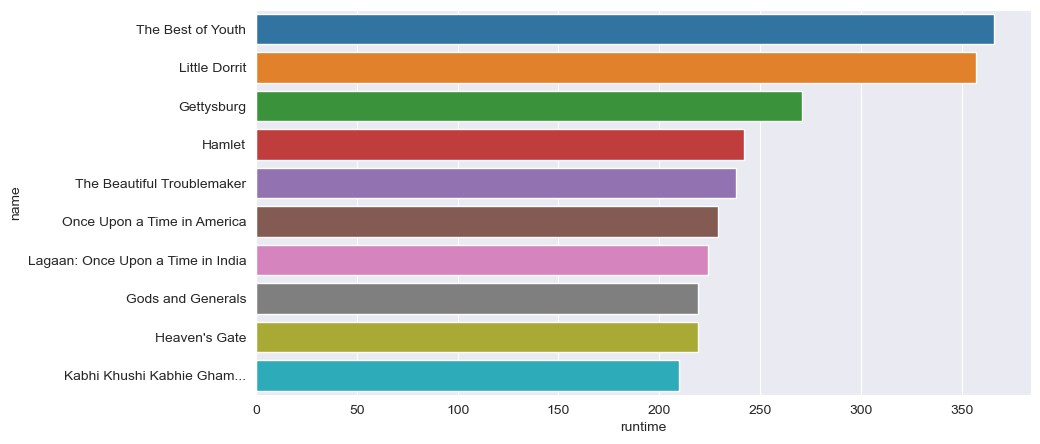

In [185]:
sns.barplot(y = "name", x = "runtime", data = runtime)

<AxesSubplot:xlabel='runtime', ylabel='budget'>

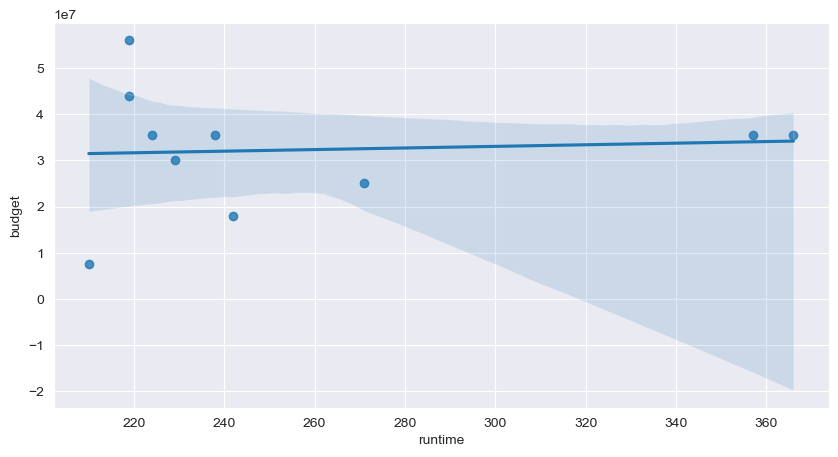

In [187]:
# Correlation between the budget and runtime of the logest movies

sns.regplot(x = runtime["runtime"], y = runtime["budget"])

<AxesSubplot:xlabel='count', ylabel='genre'>

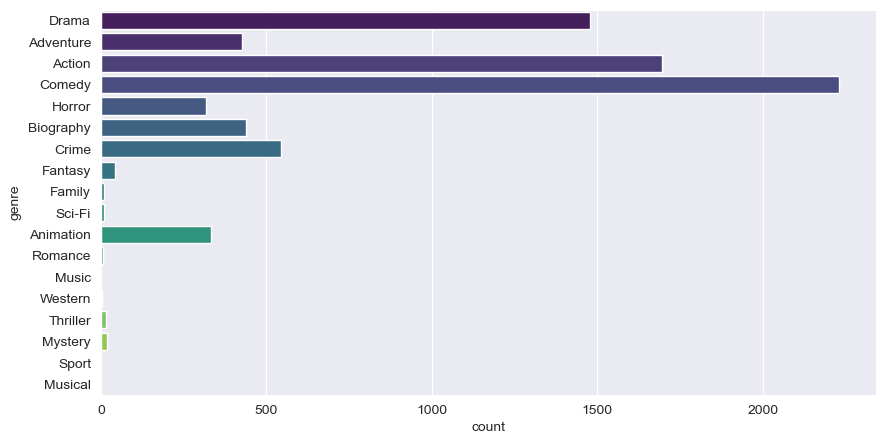

In [192]:
# Most frequent genres

sns.countplot(y = "genre", data = df, palette = "viridis")

<AxesSubplot:xlabel='rating', ylabel='gross'>

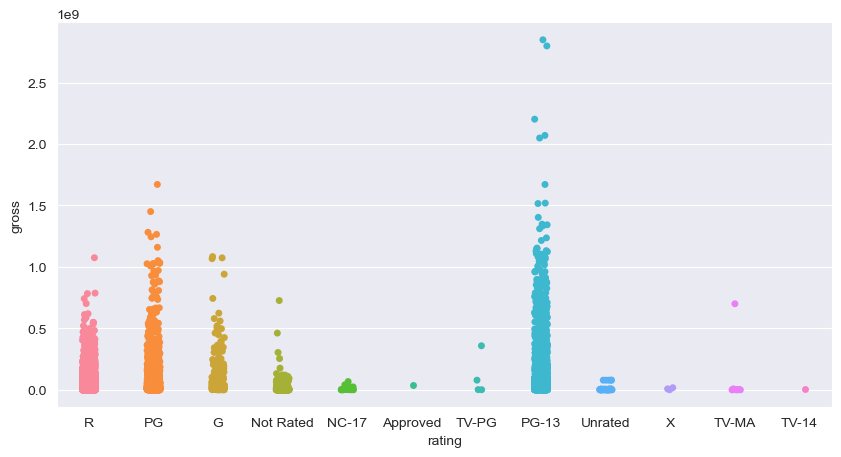

In [194]:
sns.stripplot(x = "rating", y = "gross", data = df)